<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>Exercise 1: Introduction to AIdea Hotspot</h1></td>
    </tr>
  </tbody>
</table>
Taxi Hotspot Prediction

# AU AI Winter Programs 2021
* This tutorial uses the Taxi Hotspot Prediction dataset of the AIdea platform.
* Introduce how to write deep learning programs to predict the ride demand of a specific block in a certain period of time.
* This notebook program can be executed in the cloud using Google Colab or Jupyter on a personal computer.

AUAI Summer Taxi Hotspot Prediction Project
https://aidea-web.tw/topic/e26fcd72-9da1-4baa-a6a5-36a326f61072

Pro.Hsueh-Ting Chu EMAIL: htchu.taiwan@gmail.com  FB: https://www.facebook.com/htchu.taiwan

# Exercise 1: Taxi Hotspot Prediction 
* AIdea Taxi Hotspot Prediction project

# (A) AIdea dataset


## Step 1: Load the AIdea Taxi Hotspot Prediction dataset from google drive
https://drive.google.com/file/d/13BhHdMYUP7VxYV1PNoQGx-wldEMebjyd/view?usp=sharing

In [17]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='13BhHdMYUP7VxYV1PNoQGx-wldEMebjyd',dest_path='./content', unzip=True)

## Step 2: read the training zones

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

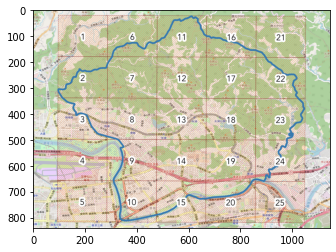

In [7]:
img = plt.imread('zones.png')
plt.imshow(img)
plt.show()

In [8]:
df_zones = pd.read_csv('zones.csv')
df_zones.shape

(25, 5)

In [9]:
df_zones.head()

,Zone_ID,left,top,right,bottom
0,1,121.551408,25.115518,121.566858,25.102831
1,2,121.551408,25.102831,121.566858,25.090144
2,3,121.551408,25.090144,121.566858,25.077457
3,4,121.551408,25.077457,121.566858,25.064770
4,5,121.551408,25.064770,121.566858,25.052083


In [10]:
df_zones.tail()

,Zone_ID,left,top,right,bottom
20,21,121.613208,25.115518,121.628658,25.102831
21,22,121.613208,25.102831,121.628658,25.090144
22,23,121.613208,25.090144,121.628658,25.077457
23,24,121.613208,25.077457,121.628658,25.064770
24,25,121.613208,25.064770,121.628658,25.052083


## Step 3: Reads training data of taxi points

In [12]:
df_train = pd.read_csv('train_hire_stats.csv')
df_train.shape

(219600, 4)

In [13]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count
0,1,2016-02-01,0,0
1,1,2016-02-01,1,0
2,1,2016-02-01,2,0
3,1,2016-02-01,3,0
4,1,2016-02-01,4,0


# (B) Check weekdays


## Step 4: Convert date string

In [14]:
df_train["tdate"] = pd.to_datetime(df_train["Date"]).dt.date

In [15]:
df_train.head()

,Zone_ID,Date,Hour_slot,Hire_count,tdate
0,1,2016-02-01,0,0,2016-02-01
1,1,2016-02-01,1,0,2016-02-01
2,1,2016-02-01,2,0,2016-02-01
3,1,2016-02-01,3,0,2016-02-01
4,1,2016-02-01,4,0,2016-02-01


## Step 5: Day of the week

In [16]:
#0 == Monday
#1 == Tuesday
#2 == Wednesday
#3 == Thursday
#4 == Friday
#5 == Saturday
#6 == Sunday
df_train.iloc[66643]['tdate'].weekday()

4